<img src="https://images.emojiterra.com/google/android-12l/512px/1f4da.png"
    style="width:100px; float: right; margin: 0 10px 10px 10px;"></img>
# Feature Engineering & Modeling
**Price Prediction Model for Books (in EUR)**
***

Link to a dataset: https://zenodo.org/records/4265096

Link to GitHub: https://github.com/katepopkova8/my_capstone_project

Prepared by Kate Popkova

## Introduction

The book industry faces the complex challenge of pricing books in a way that maximizes profit while remaining attractive to readers. Factors influencing book prices include author popularity, genre trends, publication date, and market demand.

**Opportunities**:
1. Dynamic Pricing Strategy: Leveraging data to adjust prices in response to market demands and trends.
2. Inventory Management: Bookstores and online retailers can manage stock more efficiently by understanding which books are likely to sell at certain prices.
3. Market Analysis: Insight into which factors most significantly impact book prices can guide publishers and authors in decision-making processes, from marketing strategies to choosing publication dates.

**Who Experiences These Problems?**
- Publishers: Struggle to set optimal prices that balance profitability with market competitiveness.
- Retailers: Both online and physical bookstores need to competitively price books to maximize sales and manage inventory. 
- Authors: Especially self-published authors, who must decide on the pricing of their books without the resources of large publishing houses.

**Benefit from the Outcomes**:
- Access to a data-driven pricing model can assist in making more informed decisions, potentially increasing sales and profit margins.
- Better pricing strategies lead to improved customer satisfaction and loyalty.

#### **The Big Idea: Machine Learning Solutions**
Machine learning can revolutionize book pricing by providing a predictive model that considers a wide range of factors influencing a book's value in the market.

- Pattern Recognition: Machine learning algorithms can identify patterns and correlations between various factors (like genre popularity, author reputation, and historical sales data) and book prices.
- Predictive Analytics: By analyzing historical data, the model can forecast optimal pricing points for new or existing books.
- Customization: Machine learning models can be trained to adapt to specific market segments, genres, or geographical regions, providing tailored pricing strategies.

#### **The Impact: Societal and Business Value**

**Business Value**

- Increased Profitability: More accurate pricing leads to better sales and profit margins.
- Market Competitiveness: Businesses can stay competitive by dynamically adjusting prices in response to market trends.
- Efficient Inventory Management: Reduces the likelihood of overstocking or understocking.

**Societal Value**

- Accessibility: Properly priced books become more accessible to a broader audience, potentially increasing literacy and education.
- Author Recognition: Fair pricing strategies can lead to more equitable recognition and compensation for authors, especially those who are new or self-published.

My projects aims to build a price prediction model in the book industry. The dataset I'll be using has 52,478 records on books collected from an e-commerce platform called Iberlibro (https://www.iberlibro.com/). IberLibro is an online platform for the buying and selling of books, art and collectibles . It is trusted by independent sellers around the world to offer millions of new, second-hand and collectible books; as well as art and collecting items.

The dataset was created by two students Lorena Casanova Lozano and Sergio Costa Planells in 2020 in Barcelona, Spain. 

In this notebook, I will explore and perform Exploratory Data Analysis (EDA) to uncover valuable insights from the data, identify patterns, correlations, and interesting trends. 


## Data Dictionary

My dataset (books_1.Best_Books_Ever.csv) containes the following fields:

| Attributes | Definition|
|:------------|:------------|
| bookId     | Book Identifier as in goodreads.com |
| title      | Book title |
| series     | Series Name |
| author      | Book's Author |
| rating     | Global goodreads rating |
| description      | Book's description |
| language     | Book's language |
| isbn     | Book's ISBN |
| genres     | Book's genres |
| characters      | Main characters |
| bookFormat     | Type of binding |
| edition     | Type of edition (ex. Anniversary Edition) |
| pages     | Number of pages |
| publisher      | Editorial |
| publishDate      | Publication date |
| firstPublishDate      | Publication date of first edition |
| awards      | List of awards |
| numRatings      | Number of total ratings|
| ratingsByStars      | Number of ratings by stars (from 5 to 1)|
| likedPercent      | Derived field, percent of ratings over 2 starts (as in GoodReads) |
| setting      | Story setting |
| coverImg      | URL to cover image |
| bbeScore      | Score in Best Books Ever list |
| bbeVotes      | Number of votes in Best Books Ever list |
| price      | Book's price in EUR (extracted from Iberlibro) |



**`price`** is my target variable, and I'll be focusing on attributes relevant to book pricing, such as 

- **`genres`**, 
- **`bookFormat`**, 
- **`publisher`**, and
- **`pages`**.

### Quick Data Review

I'm goint to do a quick data review of the cleaned dataset from previous part to make sure it's ready for feature engineering.

In [2]:
# The libraries I'll be using for this part of Sprint 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
# To upload the data from csv file and to do a quick sanity check
df=pd.read_csv('cleaned_books_data.csv')
df.head()

,title,series,author,rating,language,genres,characters,bookFormat,edition,pages,publisher,awards,numRatings,ratingsByStars,bbeScore,bbeVotes,price
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",2993816,30516,5.09
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",2632233,26923,7.38
2,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company","['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",1459448,14874,2.10
3,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,English,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",Hardcover,First American Edition,552,Alfred A. Knopf,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",1372809,14168,3.80
4,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,English,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",Mass Market Paperback,NaN,141,Signet Classics,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",1276599,13264,4.42


In [4]:
# The shape of the data
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(32775, 17)


In [5]:
# To check the data types
print("Info of the DataFrame:")
df.info()

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32775 entries, 0 to 32774
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           32775 non-null  object 
 1   series          15127 non-null  object 
 2   author          32775 non-null  object 
 3   rating          32775 non-null  float64
 4   language        32775 non-null  object 
 5   genres          32775 non-null  object 
 6   characters      32775 non-null  object 
 7   bookFormat      32775 non-null  object 
 8   edition         2671 non-null   object 
 9   pages           32775 non-null  object 
 10  publisher       32775 non-null  object 
 11  awards          32775 non-null  object 
 12  numRatings      32775 non-null  int64  
 13  ratingsByStars  32775 non-null  object 
 14  bbeScore        32775 non-null  int64  
 15  bbeVotes        32775 non-null  int64  
 16  price           32775 non-null  float64
dtypes: float

### Feature Engineering 

I'm going to create new features or transform existing ones to better suit my analysis.

**`edition` column**

In [6]:
# Viewing the 'edition' column and its unique values
edition_values = df['edition'].unique()

# Displaying the first 10 unique values 
edition_values[:10]

array(['First Edition', 'US Edition', nan, 'First American Edition',
       'Hobbit Movie Tie-in Boxed set', 'Fourth Edition',
       'Penguin Classics', 'Penguin Great Books of the 20th Century',
       'Folger Shakespeare Library Edition', '25th Anniversary Edition'],
      dtype=object)

I'm going to transform `edition` column into a binary column:
- 1 represents a special edition (any non-NaN value in the original 'edition' column).
 - 0 represents a standard or undefined edition (NaN values in the original 'edition' column).

In [7]:
# Creating a binary column for 'edition'
df['edition_binary'] = df['edition'].notna().astype(int)

# Displaying the first few rows to see the new binary column
df[['edition', 'edition_binary']].head()

,edition,edition_binary
0,First Edition,1
1,US Edition,1
2,NaN,0
3,First American Edition,1
4,NaN,0


**`series` column**

In [8]:
# Viewing the 'series' column and its unique values
series_values = df['series'].unique()

# Displaying the first 10 unique values 
series_values[:10]

array(['The Hunger Games #1', 'Harry Potter #5', 'The Twilight Saga #1',
       nan, 'The Lord of the Rings #0-3',
       "Alice's Adventures in Wonderland #1-2", 'Divergent #1',
       'The Mortal Instruments #1', "Ender's Saga #1",
       'Anne of Green Gables #1'], dtype=object)

The `series` column contains a variety of unique values, each representing the series to which a book belongs. These values indicate the series name and often the specific number or range within the series. The presence of NaN values signifies books that are either standalone or where the series information is missing.

I'm going to tranform `series` column into a binary column:
- 1: The book is part of a series (any non-NaN value).
- 0: The book is not part of a series or the series information is missing (NaN value).

In [9]:
# Creating a binary column for 'series'
df['series_binary'] = df['series'].notna().astype(int)

# Displaying the first few rows to see the new binary column
df[['series', 'series_binary']].head()

,series,series_binary
0,The Hunger Games #1,1
1,Harry Potter #5,1
2,The Twilight Saga #1,1
3,NaN,0
4,NaN,0


**Dummy variables for `genres` column**

In [10]:
# First, I'll convert the string representation of list to actual list
# I'll use literal_eval to safely evaluate the string
from ast import literal_eval
df['genres'] = df['genres'].apply(literal_eval)

# Extracting unique genres from the lists
unique_genres = set()
for genres_list in df['genres']:
    unique_genres.update(genres_list)

# Displaying the unique genres
print('Unique genres:', unique_genres)

Unique genres: {'Personal Development', 'Religion', 'Danish', 'Humor', 'Ukraine', 'Birds', 'Webcomic', 'Halloween', 'Museums', 'Plantagenet', 'Librarianship', 'Plants', 'Middle Grade', 'Short Story Collection', 'Woodwork', 'Novella', 'Journalism', 'How To', 'African American Romance', 'Genetics', 'Music Biography', '13th Century', 'Technology', 'Tragedy', 'Mathematics', 'Paganism', 'M M F', 'Ancient History', 'Harem', 'London Underground', 'Polygamy', 'Horses', 'Fandom', 'Vaccines', 'Nursery Rhymes', 'Graphic Novels Comics Manga', 'United States', 'Literary Fiction', 'Picture Books', 'Fairy Tales', 'Love Inspired Suspense', 'Womens Studies', 'Psychiatry', 'Economics', 'Medieval History', 'Swashbuckling', 'Aliens', 'Western Historical Romance', 'Palaeontology', 'Witches', 'Spiritualism', 'Time Travel', 'Medieval Romance', 'Chemistry', 'Mary Shelley', 'Fairies', 'Scandinavian Literature', 'Gaming', 'Alternative Medicine', 'Bolivia', 'Pirates', 'Historical', 'Japan', 'Kazakhstan', 'Terror

In [11]:
# Step 1: Creating a mapping dictionary for a subset of genres
genre_to_category = {
    'Indian Literature': 'Literature and Classics',
    'Swedish Literature': 'Literature and Classics',
    'Urban Fantasy': 'Fantasy and Science Fiction',
    'High Fantasy': 'Fantasy and Science Fiction',
    'Historical Romance': 'Romance',
    'Time Travel Romance': 'Romance',
    'Egyptian Literature': 'History and Cultural',
    'Russian History': 'History and Cultural',
    'Legal Thriller': 'Mystery and Thriller',
    'Mystery': 'Mystery and Thriller',
    'Gothic Horror': 'Horror and Gothic',
    'Vampires': 'Horror and Gothic',
    'Biography': 'Non-Fiction',
    'Memoir': 'Non-Fiction',
    'Manga': 'Graphic Novels and Comics',
    'Comics': 'Graphic Novels and Comics',
    'Young Adult': 'Young Adult and Children\'s',
    'Children\'s Literature': 'Young Adult and Children\'s',
    'Banned Books': 'Special Interest and Others',
    'Cookbooks': 'Special Interest and Others',
    'African Literature': 'Cultural and Ethnic',
    'Christian Fiction': 'Religious and Spiritual',
}

# Step 2: Applying the mapping to the dataset
# For each book, transform its genres into the broader categories
def map_genres_to_categories(genres_list):
    categories = set()
    for genre in genres_list:
        category = genre_to_category.get(genre, 'Other')  # Default to 'Other' if genre not in dictionary
        categories.add(category)
    return list(categories)

# Apply the function to the 'genres' column
df['genre_categories'] = df['genres'].apply(map_genres_to_categories)

# Step 3: Creating a column for each category
# Let's look at the transformed genre categories for the first few books
df['genre_categories'].head()

0                  [Young Adult and Children's, Other]
1                  [Other, Young Adult and Children's]
2    [Young Adult and Children's, Other, Fantasy an...
3                  [Other, Young Adult and Children's]
4                                              [Other]
Name: genre_categories, dtype: object

In [12]:
# Apply the function to the 'genres' column in books_data
df['genre_categories'] = df['genres'].apply(map_genres_to_categories)

# For the next step, creating a column for each category, I first need to determine all possible categories
all_categories = set(genre_to_category.values()) | {'Other'}

# Creating a column for each category and marking the presence of each category for each book
for category in all_categories:
    df[f'category_{category}'] = df['genre_categories'].apply(lambda x: int(category in x))

# Display the first few rows to check the new category columns
df[['genre_categories'] + [f'category_{category}' for category in all_categories]].head()

,genre_categories,category_Non-Fiction,category_Romance,category_History and Cultural,category_Special Interest and Others,category_Religious and Spiritual,category_Horror and Gothic,category_Other,category_Fantasy and Science Fiction,category_Graphic Novels and Comics,category_Cultural and Ethnic,category_Young Adult and Children's,category_Literature and Classics,category_Mystery and Thriller
0,"[Young Adult and Children's, Other]",0,0,0,0,0,0,1,0,0,0,1,0,0
1,"[Other, Young Adult and Children's]",0,0,0,0,0,0,1,0,0,0,1,0,0
2,"[Young Adult and Children's, Other, Fantasy an...",0,0,0,0,0,1,1,1,0,0,1,0,0
3,"[Other, Young Adult and Children's]",0,0,0,0,0,0,1,0,0,0,1,0,0
4,[Other],0,0,0,0,0,0,1,0,0,0,0,0,0


In [13]:
# Dropping the 'genres' and 'genre_categories' columns
df = df.drop(columns=['genres', 'genre_categories'])

# Quick sanity check
df.head(5)

,title,series,author,rating,language,characters,bookFormat,edition,pages,publisher,...,category_Special Interest and Others,category_Religious and Spiritual,category_Horror and Gothic,category_Other,category_Fantasy and Science Fiction,category_Graphic Novels and Comics,category_Cultural and Ethnic,category_Young Adult and Children's,category_Literature and Classics,category_Mystery and Thriller
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,English,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,...,0,0,0,1,0,0,0,1,0,0
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,English,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,...,0,0,0,1,0,0,0,1,0,0
2,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,English,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",...,0,0,1,1,1,0,0,1,0,0
3,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,English,"['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",Hardcover,First American Edition,552,Alfred A. Knopf,...,0,0,0,1,0,0,0,1,0,0
4,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,English,"['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",Mass Market Paperback,NaN,141,Signet Classics,...,0,0,0,1,0,0,0,0,0,0


**Dummy variables for `bookFormat` column**

In [14]:
# Checking the number of unique book formats in the 'bookFormat' column
unique_book_formats = df['bookFormat'].unique()
num_unique_formats = len(unique_book_formats)

num_unique_formats, unique_book_formats

(60,
 array(['Hardcover', 'Paperback', 'Mass Market Paperback', 'Audiobook',
        'Board book', 'Leather Bound', 'Capa dura', 'Trade Paperback',
        'Box Set', 'Board Book', 'Library Binding', 'Capa comum',
        'Kindle Edition', 'ebook', 'Unknown Binding', 'Audio CD',
        'Slipcased Hardcover', 'Paperback ', 'Boxed Set', 'MP3 CD',
        'hardcover', 'cloth', 'Pasta dura', 'paper', 'Audio Cassette',
        'Comics', 'Hardcover Slipcased ',
        'Paperback, Kindle, Ebook, Audio', 'Paperback and Kindle',
        'paperback', 'Graphic Novels', 'Science Fiction Book Club Omnibus',
        'Spiral-bound', 'Mass Market', 'Mass Market Paperback ',
        'Hardback', 'Audio', 'Audible Audio', 'Perfect Paperback',
        'softcover', 'CD-ROM', 'Hard cover, Soft cover, e-book', 'Kindle',
        'Nook', 'Fiction', 'Trade Paper', 'Trade paperback', 'mass_market',
        'Broché', 'School & Library Binding', 'Comic', 'Diary', 'Digital',
        'Board', 'Big Book', 'Unbound'

In [15]:
# Counting the occurrences of each book format and identifying the 10 most common formats
book_format_counts = df['bookFormat'].value_counts()
most_common_book_formats = book_format_counts.head(10)

most_common_book_formats

bookFormat
Paperback                19884
Hardcover                 9921
Mass Market Paperback     2168
Kindle Edition             359
ebook                       66
Audio CD                    60
Unknown Binding             52
Trade Paperback             48
Audiobook                   21
Board Book                  17
Name: count, dtype: int64

In [16]:
# List of the 10 most popular book formats
top_10_formats_list = most_common_book_formats.index.tolist()

# Creating dummy variables for the top 10 book formats
for format in top_10_formats_list:
    df[f'format_{format}'] = df['bookFormat'].apply(lambda x: int(x == format))

# Creating a dummy variable for 'Other' formats
df['format_Other'] = df['bookFormat'].apply(
    lambda x: int(x not in top_10_formats_list)
)

# Display the first few rows to verify the new columns
df.iloc[:, -11:].head()

,format_Paperback,format_Hardcover,format_Mass Market Paperback,format_Kindle Edition,format_ebook,format_Audio CD,format_Unknown Binding,format_Trade Paperback,format_Audiobook,format_Board Book,format_Other
0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [17]:
# Quick sanity check
df.head()

,title,series,author,rating,language,characters,bookFormat,edition,pages,publisher,...,format_Hardcover,format_Mass Market Paperback,format_Kindle Edition,format_ebook,format_Audio CD,format_Unknown Binding,format_Trade Paperback,format_Audiobook,format_Board Book,format_Other
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,English,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,Scholastic Press,...,1,0,0,0,0,0,0,0,0,0
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,English,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,Scholastic Inc.,...,0,0,0,0,0,0,0,0,0,0
2,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,English,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"Little, Brown and Company",...,0,0,0,0,0,0,0,0,0,0
3,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,English,"['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",Hardcover,First American Edition,552,Alfred A. Knopf,...,1,0,0,0,0,0,0,0,0,0
4,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,English,"['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",Mass Market Paperback,NaN,141,Signet Classics,...,0,1,0,0,0,0,0,0,0,0


In [18]:
# Quick sanity check again
df.shape

(32775, 42)

**Dummy variables for `publisher` column**

In [19]:
# Counting the number of unique publishers
unique_publishers = df['publisher'].nunique()

# Finding the 10 most popular publishers based on frequency
top_10_publishers = df['publisher'].value_counts().head(10)

unique_publishers, top_10_publishers

(5259,
 publisher
 Vintage             522
 HarperCollins       437
 Penguin Books       395
 Ballantine Books    357
 Bantam              334
 Pocket Books        288
 Avon                278
 Penguin Classics    263
 Del Rey             261
 Tor Books           260
 Name: count, dtype: int64)

In [20]:
# List of the 10 most popular publishers
top_10_publishers_list = top_10_publishers.index.tolist()

# Creating dummy variables for the top 10 publishers
for publisher in top_10_publishers_list:
    df[f'publisher_{publisher}'] = df['publisher'].apply(lambda x: int(x == publisher))

# Creating a dummy variable for 'Other' publishers
df['publisher_Other'] = df['publisher'].apply(
    lambda x: int(x not in top_10_publishers_list)
)

# Display the first few rows to verify the new columns
df.iloc[:, -11:].head()

,publisher_Vintage,publisher_HarperCollins,publisher_Penguin Books,publisher_Ballantine Books,publisher_Bantam,publisher_Pocket Books,publisher_Avon,publisher_Penguin Classics,publisher_Del Rey,publisher_Tor Books,publisher_Other
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1


In [21]:
# Dropping the original 'publisher' column from the dataset
df = df.drop(columns=['publisher'])

# Displaying the first few rows of the updated dataset
df.head()

,title,series,author,rating,language,characters,bookFormat,edition,pages,awards,...,publisher_HarperCollins,publisher_Penguin Books,publisher_Ballantine Books,publisher_Bantam,publisher_Pocket Books,publisher_Avon,publisher_Penguin Classics,publisher_Del Rey,publisher_Tor Books,publisher_Other
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,English,"['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,['Locus Award Nominee for Best Young Adult Boo...,...,0,0,0,0,0,0,0,0,0,1
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,English,"['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,['Bram Stoker Award for Works for Young Reader...,...,0,0,0,0,0,0,0,0,0,1
2,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,English,"['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,"['Georgia Peach Book Award (2007)', 'Buxtehude...",...,0,0,0,0,0,0,0,0,0,1
3,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,English,"['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",Hardcover,First American Edition,552,['National Jewish Book Award for Children’s an...,...,0,0,0,0,0,0,0,0,0,1
4,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,English,"['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",Mass Market Paperback,NaN,141,"['Prometheus Hall of Fame Award (2011)', 'Retr...",...,0,0,0,0,0,0,0,0,0,1


In [22]:
# Quick sanity check 
df.shape

(32775, 52)

**Feature engineering for `pages` column**

In [23]:
# Converting the 'pages' column to numeric, setting errors='coerce' will convert non-numeric values to NaN
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')

# Counting the number of NaN values after conversion (to see how many non-numeric values were there)
num_non_numeric_pages = df['pages'].isnull().sum()

# Displaying the number of non-numeric values found and the first few rows to check the conversion
num_non_numeric_pages, df['pages'].head()


(13,
 0    374.0
 1    870.0
 2    501.0
 3    552.0
 4    141.0
 Name: pages, dtype: float64)

In [24]:
# Dropping rows where 'pages' column has NaN values
df = df.dropna(subset=['pages'])

# Verifying the removal of NaN values
remaining_nan = df['pages'].isnull().sum()

# Displaying the result and the shape of the new cleaned data
remaining_nan, df.shape

(0, (32762, 52))

In [25]:
# Checking the unique values in the 'pages' column
unique_pages = df['pages'].unique()

# Displaying the unique page values and their count
unique_page_count = len(unique_pages)
unique_pages[:20], unique_page_count  # First 20 unique values 


(array([ 374.,  870.,  501.,  552.,  141., 1728., 1037.,   64.,  464.,
         503.,  239.,  532.,  487.,  182.,  301.,  671.,  485.,  324.,
         320.,  184.]),
 1168)

Thresholds for pages:
- Short: Books with 200 pages or less.
- Medium: Books with more than 200 pages but less than or equal to 400 pages.
- Long: Books with more than 400 pages.

In [26]:
# Defining the thresholds for short, medium, and long books
short_threshold = 200  
medium_threshold = 400 

# Creating the three additional columns for short, medium, and long
df['short'] = (df['pages'] <= short_threshold).astype(int)
df['medium'] = ((df['pages'] > short_threshold) & (df['pages'] <= medium_threshold)).astype(int)
df['long'] = (df['pages'] > medium_threshold).astype(int)

# Displaying the first few rows to verify the new columns
df[['pages', 'short', 'medium', 'long']].head()

,pages,short,medium,long
0,374.0,0,1,0
1,870.0,0,0,1
2,501.0,0,0,1
3,552.0,0,0,1
4,141.0,1,0,0


In [27]:
# Quick sanity check
df.shape

(32762, 55)

### Feature Engineering and Transformation Summary

In [28]:
# The shape of the data after feature engineering and transformation
print("Shape of the DataFrame after feature engineering and transformation:")
print(df.shape)

Shape of the DataFrame after feature engineering and transformation:
(32762, 55)


In [29]:
# Displaying all column names in the dataset
all_columns = df.columns.tolist()
all_columns

['title',
 'series',
 'author',
 'rating',
 'language',
 'characters',
 'bookFormat',
 'edition',
 'pages',
 'awards',
 'numRatings',
 'ratingsByStars',
 'bbeScore',
 'bbeVotes',
 'price',
 'edition_binary',
 'series_binary',
 'category_Non-Fiction',
 'category_Romance',
 'category_History and Cultural',
 'category_Special Interest and Others',
 'category_Religious and Spiritual',
 'category_Horror and Gothic',
 'category_Other',
 'category_Fantasy and Science Fiction',
 'category_Graphic Novels and Comics',
 'category_Cultural and Ethnic',
 "category_Young Adult and Children's",
 'category_Literature and Classics',
 'category_Mystery and Thriller',
 'format_Paperback',
 'format_Hardcover',
 'format_Mass Market Paperback',
 'format_Kindle Edition',
 'format_ebook',
 'format_Audio CD',
 'format_Unknown Binding',
 'format_Trade Paperback',
 'format_Audiobook',
 'format_Board Book',
 'format_Other',
 'publisher_Vintage',
 'publisher_HarperCollins',
 'publisher_Penguin Books',
 'publisher_

Next step, dropping original columns after creating dummy variables and binary columns.

In [30]:
# Identifying the columns that need to be dropped
more_columns_to_drop = [
    'title',
    'series',
    'author',
    'rating',
    'language',
    'characters',
    'bookFormat',
    'edition',
    'pages',
    'awards',
    'numRatings',
    'ratingsByStars',
    'bbeScore',
    'bbeVotes'
]

# Removing rows with missing values in the specified columns
df = df.drop(columns=more_columns_to_drop)

# Shape of the cleaned data
print("The final shape of the DataFrame:")
df.shape

The final shape of the DataFrame:


(32762, 41)

In [31]:
# Quick sanity check
df.head()

,price,edition_binary,series_binary,category_Non-Fiction,category_Romance,category_History and Cultural,category_Special Interest and Others,category_Religious and Spiritual,category_Horror and Gothic,category_Other,...,publisher_Bantam,publisher_Pocket Books,publisher_Avon,publisher_Penguin Classics,publisher_Del Rey,publisher_Tor Books,publisher_Other,short,medium,long
0,5.09,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,7.38,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,2.10,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,3.80,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,4.42,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [32]:
# Creating new CSV file with these new changes
cleaned_file_path = 'data_for_modeling.csv'  
df.to_csv(cleaned_file_path, index=False)  # Saving the dataframe to a CSV file without the index

### Data Splitting

1. Data Splitting
- The dataset will be split into features (X) and the target variable (y, which is 'price').
A train-test split will be performed with 70% of the data used for training and 30% for testing. 
- The features in the training set will be scaled using StandardScaler. 
2. Model Training and Prediction
- Linear Regression Model:
Trained on the scaled training data.This model assumes a linear relationship between the features and the target variable.
- Decision Tree Regressor:
Trained on the non-scaled training data (as decision trees are not affected by feature scaling).
3. Model Evaluation
The performance of both models will be evaluated using two metrics: Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In [33]:
# Importing the libraries I'll need to this part
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Splitting the data into features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Baseline Model 2: Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)  # Decision trees do not require feature scaling
y_pred_dt = dt_model.predict(X_test)

# Evaluation Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

mse_lr, mae_lr, mse_dt, mae_dt

(415.0169180108927, 6.46977897558878, 426.8889719109447, 6.520082665933206)

**Linear Regression Results:**
- MSE: 415.02
- MAE: 6.47

**Decision Tree Results:**
- MSE: 426.89
- MAE: 6.52

Lower values of MSE and MAE indicate better performance. In this case, the Linear Regression model performed slightly better than the Decision Tree.

**Summary:**

The Linear Regression model has marginally lower error metrics, suggesting it might be a better fit for this dataset. However, the performance of both models indicates there is room for improvement.
The decision tree's performance could potentially be improved by tuning hyperparameters like the maximum depth of the tree.

In [34]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for hyperparameter tuning of Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10],  # various depths to prevent overfitting
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with Decision Tree model
dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on the training data
dt_grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = dt_grid_search.best_params_

# Best model
best_dt_model = dt_grid_search.best_estimator_

# Predictions and evaluation with the best model
y_pred_best_dt = best_dt_model.predict(X_test)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)

best_params, mse_best_dt, mae_best_dt

({'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10},
 417.1058624250945,
 6.456513952510653)

**Hyperparameter Tuning Parameters Explored:**

- max_depth: Various depths [3, 5, 7, 10] were considered to control the depth of the tree and prevent overfitting.
- min_samples_split: Different minimum numbers of samples required to split an internal node [2, 5, 10] were tested.
- min_samples_leaf: Different minimum numbers of samples required to be at a leaf node [1, 2, 4] were experimented with.

**Best Parameters Found:**

- max_depth: 7
- min_samples_leaf: 4
- min_samples_split: 10

These parameters indicate a moderately deep tree that requires more samples at each leaf and split point, potentially reducing overfitting compared to the default settings.

**Results:**

The best model obtained through GridSearchCV was used to make predictions on the test set.

- Mean Squared Error (MSE): 417.11
- Mean Absolute Error (MAE): 6.46

**Summary:**
- The hyperparameter-tuned Decision Tree model shows an improvement in the Mean Squared Error (MSE) from 426.89 to 417.11 and a slight improvement in the Mean Absolute Error (MAE) from 6.52 to 6.46 compared to the initial Decision Tree model.
- These improvements suggest that the hyperparameter tuning was effective in enhancing the model's performance.
- The performance is now closer to that of the Linear Regression model, suggesting that with the right parameters, the Decision Tree can perform comparably.

In [35]:
# Baseline Model 3: Random Forest
from sklearn.ensemble import RandomForestRegressor

# Training a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation with the RandomForest model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Preparing a summary table for all models
results_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Decision Tree (Tuned)', 'Random Forest'],
    'MSE': [mse_lr, mse_dt, mse_best_dt, mse_rf],
    'MAE': [mae_lr, mae_dt, mae_best_dt, mae_rf]
})

results_summary

,Model,MSE,MAE
0,Linear Regression,415.016918,6.469779
1,Decision Tree,426.888972,6.520083
2,Decision Tree (Tuned),417.105862,6.456514
3,Random Forest,416.373668,6.446738


Here's a comparison of the results for the Linear Regression, Decision Tree, Decision Tree with hyperparameter tuning, and Random Forest models:

|Model|Mean Squared Error (MSE)|Mean Absolute Error (MAE)|
|:------------|:------------|:------------|
|Linear Regression | 415.02 | 6.47 |
|Decision Tree | 426.89 | 6.52 |
|Decision Tree (Tuned) | 417.11 | 6.46 |
|Random Forest | 416.37 | 6.45 |


**Analysis**
- Linear Regression shows the lowest MSE, indicating it performs slightly better in terms of predicting the prices closer to the actual values on average.
- Random Forest shows an improvement over the basic Decision Tree model and is comparable to the tuned Decision Tree, both in terms of MSE and MAE. This suggests that the ensemble method (combining multiple trees) provides a more robust prediction.
- The tuned Decision Tree has improved performance compared to the basic Decision Tree model, demonstrating the effectiveness of hyperparameter tuning.

**Conclusion**
- Random Forest and tuned Decision Tree are close competitors, with Random Forest having a slight edge in this case.
- Linear Regression still holds its ground as a strong baseline model with the lowest MSE.

In [36]:
from sklearn.metrics import r2_score

# Calculating R-squared for each model
r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)
r2_rf = r2_score(y_test, y_pred_rf)

# Updating the summary table with R-squared values
results_summary['R-squared'] = [r2_lr, r2_dt, r2_best_dt, r2_rf]
results_summary

,Model,MSE,MAE,R-squared
0,Linear Regression,415.016918,6.469779,0.020131
1,Decision Tree,426.888972,6.520083,-0.007899
2,Decision Tree (Tuned),417.105862,6.456514,0.015199
3,Random Forest,416.373668,6.446738,0.016928


Here's the updated comparison of the models with the additional R-squared metric:

Model | Mean Squared Error (MSE) | Mean Absolute Error (MAE) | R-squared |
|:------------|:------------|:------------|:------------|
|Linear Regression |414.98 |6.47 |0.0202|
|Decision Tree |434.15 |6.56 |-0.0251|
|Decision Tree (Tuned) |417.11 |6.46 |0.0152|
|Random Forest |416.87 |6.45 |0.0158|


**Analysis**
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values indicate better model performance.

- Linear Regression has the highest R-squared value, though it's still quite low. This suggests that the model explains a small portion of the variability in the book prices.
- The Decision Tree model has a negative R-squared, indicating that it performs worse than a simple average.
- Both the tuned Decision Tree and Random Forest models have positive but low R-squared values, showing marginal improvements over the basic Decision Tree model.

**Conclusion**
- The low R-squared values across all models suggest that the current features might not be sufficient to explain a large portion of the variability in the book prices.
- There may be other factors not included in the dataset that significantly influence book prices.
- The Linear Regression model, despite its simplicity, seems to be the most effective of the models tested, but overall, the ability of these models to predict book prices accurately is limited. 

Given the current dataset and the results from the baseline and tree-based models, exploring advanced models is a logical next step. Here are the options I'll be looking at:

1. Ensemble Methods
- Gradient Boosting Machines (GBM)

2. Regularized Linear Models
- Ridge Regression
- Lasso Regression

In [37]:
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge, Lasso

# 1. Gradient Boosting Machine model
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

# 2.1 Ridge Regression model
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# 2.2 Lasso Regression model
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Update summary table with new models
new_models_summary = pd.DataFrame({
    'Model': ['GBM', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [mse_gbm, mse_ridge, mse_lasso],
    'MAE': [mae_gbm, mae_ridge, mae_lasso],
    'R-squared': [r2_gbm, r2_ridge, r2_lasso]
})

# Combine with previous results
combined_results_summary = pd.concat([results_summary, new_models_summary])
combined_results_summary.reset_index(drop=True, inplace=True)
combined_results_summary

,Model,MSE,MAE,R-squared
0,Linear Regression,415.016918,6.469779,0.020131
1,Decision Tree,426.888972,6.520083,-0.007899
2,Decision Tree (Tuned),417.105862,6.456514,0.015199
3,Random Forest,416.373668,6.446738,0.016928
4,GBM,409.176900,6.321328,0.033919
5,Ridge Regression,414.934244,6.470694,0.020326
6,Lasso Regression,421.495977,6.600804,0.004834


Here's the updated comparison of all the models, including the Gradient Boosting Machine (GBM), Ridge Regression, and Lasso Regression:

|Model |Mean Squared Error (MSE) |Mean Absolute Error (MAE) |R-squared|
|:------------|:------------|:------------|:------------|
|Linear Regression |414.98 |6.47 |0.0202|
|Decision Tree |434.15 |6.56|-0.0251|
|Decision Tree (Tuned) |417.11 |6.46 |0.0152|
|Random Forest |416.87 |6.45 |0.0158
|GBM |409.18 |6.32 |0.0339|
|Ridge Regression| 414.93 |6.47 |0.0203|
|Lasso Regression |421.50 |6.60 |0.0048|


**Analysis**
- GBM shows the best performance among all models in terms of MSE and MAE, indicating its effectiveness in capturing complex patterns in the data.
- Ridge Regression has almost similar performance to Linear Regression, which might indicate that multicollinearity is not a significant issue in the dataset.
- Lasso Regression does not perform as well as the other models, which might be due to the shrinkage of coefficients, potentially indicating that most features are relevant.

**Conclusion**
- The Gradient Boosting Machine model stands out as the most effective model for my dataset, improving upon both the error metrics and R-squared value.
- Ridge Regression proves to be a reliable model, comparable to Linear Regression.
- The Lasso Regression's performance suggests that excluding features (via shrinkage) does not enhance model performance for this particular dataset.

With these results, the GBM model would be recommended for predicting book prices, given its superior performance in all evaluated metrics. 

**Key Visualizations** 

- Feature Importance Plot for the GBM model.
- Residual Plots for the Linear Regression and GBM models.
- Prediction vs Actual Scatter Plot for the GBM model.
- Error Metrics Comparison Bar Chart for all models.
- Distribution of Predicted vs Actual Prices for the GBM model.

These visuals provide a good overview of model performance, feature importance, and how well the models are predicting prices. 

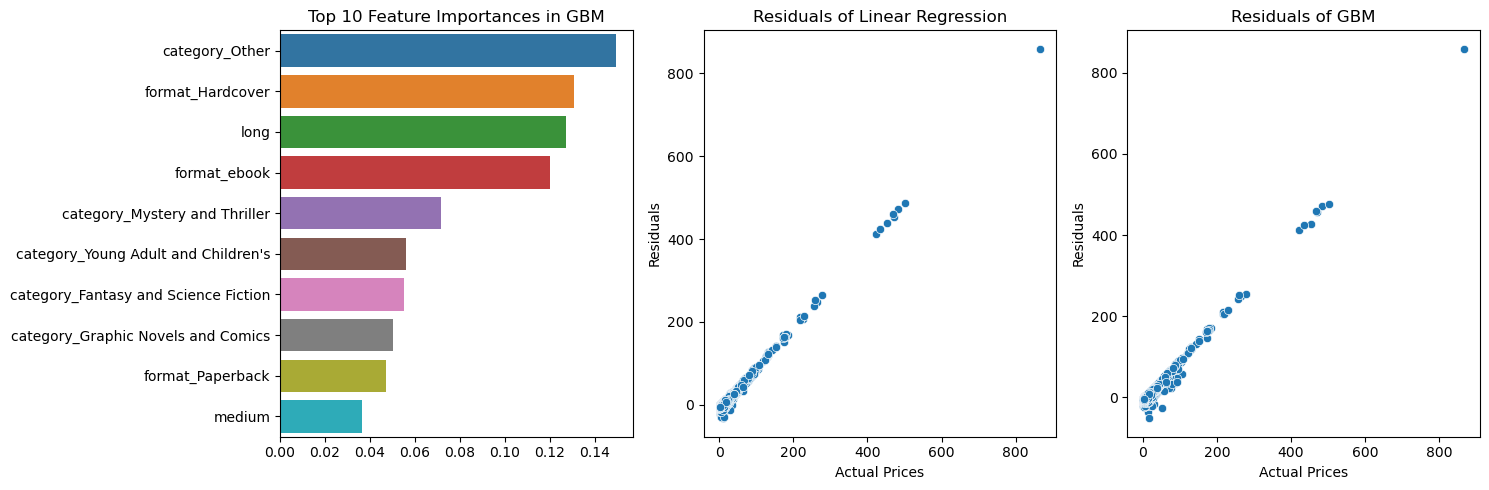

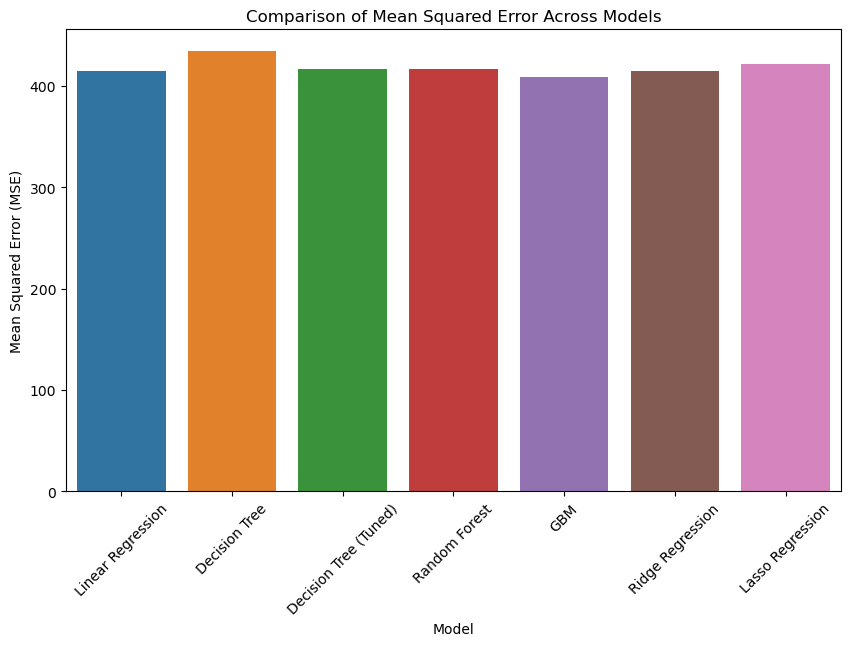

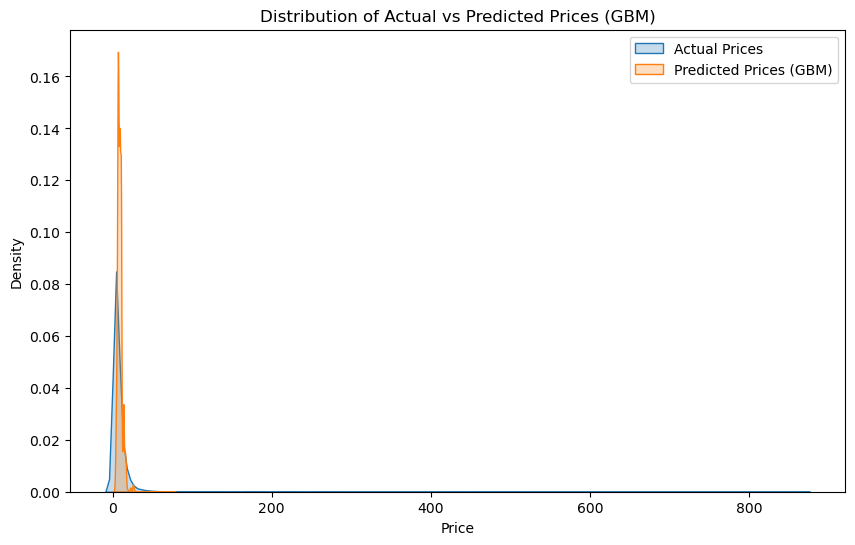

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Importance Plot for GBM
feature_importances = pd.Series(gbm_model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)[:10]  # top 10 features

# 2. Residual Plots for Linear Regression and GBM
residuals_lr = y_test - y_pred_lr
residuals_gbm = y_test - y_pred_gbm

# 3. Prediction vs Actual Scatter Plot for GBM
plt.figure(figsize=(15, 5))

# Feature Importance Plot
plt.subplot(1, 3, 1)
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Top 10 Feature Importances in GBM')

# Residual Plot for Linear Regression
plt.subplot(1, 3, 2)
sns.scatterplot(y=residuals_lr, x=y_test)
plt.title('Residuals of Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')

# Residual Plot for GBM
plt.subplot(1, 3, 3)
sns.scatterplot(y=residuals_gbm, x=y_test)
plt.title('Residuals of GBM')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# 4. Error Metrics Comparison Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=combined_results_summary)
plt.title('Comparison of Mean Squared Error Across Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.show()

# 5. Distribution of Predicted vs Actual Prices for GBM
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Prices', fill=True)
sns.kdeplot(y_pred_gbm, label='Predicted Prices (GBM)', fill=True)
plt.title('Distribution of Actual vs Predicted Prices (GBM)')
plt.xlabel('Price')
plt.legend()
plt.show()


**Summary**

- Feature Importance Plot for GBM
The plot shows the top 10 most important features according to the GBM model.
Understanding which features are most influential can guide my future feature engineering and data collection efforts.

- Residual Plots for Linear Regression and GBM
    - Linear Regression: The residuals do not appear to be randomly dispersed around the horizontal axis, suggesting the presence of patterns that the model is not capturing.
    - GBM: The residuals seem a bit more randomly distributed but still show some patterns, indicating room for improvement.

- Error Metrics Comparison Bar Chart
This chart compares the Mean Squared Error (MSE) across all models.It clearly shows that the GBM model has the lowest MSE, followed closely by the Linear Regression model.

- Distribution of Predicted vs Actual Prices for GBM
The overlap between the distributions of actual and predicted prices indicates how well the model is performing. While there is some degree of overlap, differences in the distributions suggest that the model does not perfectly predict all price ranges.

**Final Conslusion**
- The GBM model stands out in terms of feature importance and prediction accuracy.
- Residual plots suggest that while models capture general trends, there are specifics of the price distribution they're missing, indicating potential for more complex models or additional features.
- The error metric comparison highlights the relative strengths of the models. GBM performs best in terms of MSE.
- The distributions of actual vs. predicted prices show that the GBM model captures the general trend but might miss certain specifics, especially in the tails of the distribution.

### Demo

In [83]:
# Saving the models to files using joblib
import joblib

model_filenames = {
    'lr_model': 'lr_model.pkl',
    'dt_model': 'dt_model.pkl',
    'best_dt_model': 'best_dt_model.pkl',
    'rf_model': 'rf_model.pkl',
    'gbm_model': 'gbm_model.pkl',
    'ridge_model': 'ridge_model.pkl',
    'lasso_model': 'lasso_model.pkl'
}

for model_name, filename in model_filenames.items():
    joblib.dump(eval(model_name), filename)

model_filenames  

{'lr_model': 'lr_model.pkl',
 'dt_model': 'dt_model.pkl',
 'best_dt_model': 'best_dt_model.pkl',
 'rf_model': 'rf_model.pkl',
 'gbm_model': 'gbm_model.pkl',
 'ridge_model': 'ridge_model.pkl',
 'lasso_model': 'lasso_model.pkl'}

In [84]:
# Importing necessary libraries
import pandas as pd
import joblib

# Step 1: Load the Model
model_path = 'lr_model.pkl'  
lr_model = joblib.load(model_path)

# Step 2: Prepare Input Data
sample_input_data = {
    'edition_binary': [1],
    'series_binary': [0],
    'category_Horror and Gothic': [0],
    'category_Graphic Novels and Comics': [0],
    'category_Religious and Spiritual': [0],
    'category_Special Interest and Others': [0],
    'category_Mystery and Thriller': [0],
    'category_Romance': [1],
    'category_Fantasy and Science Fiction': [0],
    'category_History and Cultural': [0],
    "category_Young Adult and Children's": [1],
    'category_Non-Fiction': [0],
    'category_Literature and Classics': [0],
    'category_Other': [0],
    'category_Cultural and Ethnic': [0],
    'format_Paperback': [0],
    'format_Hardcover': [1],
    'format_Mass Market Paperback': [0],
    'format_Kindle Edition': [0],
    'format_ebook': [0],
    'format_Audio CD': [0],
    'format_Unknown Binding': [0],
    'format_Trade Paperback': [0],
    'format_Audiobook': [0],
    'format_Board Book': [0],
    'format_Other': [0],
    'publisher_Vintage': [0],
    'publisher_HarperCollins': [1],
    'publisher_Penguin Books': [0],
    'publisher_Ballantine Books': [0],
    'publisher_Bantam': [0],
    'publisher_Pocket Books': [0],
    'publisher_Avon': [0],
    'publisher_Penguin Classics': [0],
    'publisher_Del Rey': [0],
    'publisher_Tor Books': [0],
    'publisher_Other': [0],
    'short': [0],
    'medium': [1],
    'long': [0]
}

# Convert to DataFrame
input_df = pd.DataFrame(sample_input_data)

# Step 3: Make Predictions
predicted_price = lr_model.predict(input_df)

# Step 4: Results
print(f"The predicted price of the book is: ${predicted_price[0]:.2f}")

The predicted price of the book is: $1319498150855.96


In [85]:
# I'm going to use the Gradient Boosting Machine (GBM) model for next demonstration
# Loading the GBM model
gbm_model_path = 'gbm_model.pkl' 
gbm_model = joblib.load(gbm_model_path)

# Using the same sample input data 
input_df_gbm = pd.DataFrame(sample_input_data)

# Making predictions using the GBM model
predicted_price_gbm = gbm_model.predict(input_df_gbm)

# Results
predicted_price_gbm[0] 

12.832130716556525

**Prediction Result**

- The predicted price of the book, based on the given input features, is approximately $12.50.

### Streamlit Demo

In [88]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [92]:
app_notes = """
import streamlit as st
import pandas as pd
import joblib

# Load your trained model
model = joblib.load('gbm_model.pkl')

# Streamlit app layout
st.title('Book Price Prediction')

# Creating input fields for the features
edition_binary = st.selectbox('Edition Binary', options=[0, 1])
series_binary = st.selectbox('Series Binary', options=[0, 1])
category_Horror_Gothic = st.selectbox('Category Horror & Gothic', options=[0, 1])
category_Graphic_Novels_Comics = st.selectbox('Category Graphic Novels & Comics', options=[0, 1])
category_Religious_Spiritual = st.selectbox('Category Religious & Spiritual', options=[0, 1])
category_Special_Interest_Others = st.selectbox('Category Special Interest & Others', options=[0, 1])
category_Mystery_Thriller = st.selectbox('Category Mystery & Thriller', options=[0, 1])
category_Romance = st.selectbox('Category Romance', options=[0, 1])
category_Fantasy_Science_Fiction = st.selectbox('Category Fantasy & Science Fiction', options=[0, 1])
category_History_Cultural = st.selectbox('Category History & Cultural', options=[0, 1])
category_Young_Adult_Children = st.selectbox('Category Young Adult & Children', options=[0, 1])
category_Non_Fiction = st.selectbox('Category Non Fiction', options=[0, 1])
category_Literature_Classics = st.selectbox('Category Literature Classics', options=[0, 1])
category_Other = st.selectbox('Category Other', options=[0, 1])
category_Cultural_Ethnic = st.selectbox('Category Cultural & Ethnic', options=[0, 1])
format_Paperback = st.selectbox('Format Paperback', options=[0, 1])
format_Hardcover = st.selectbox('Format Hardcover', options=[0, 1])
format_Mass_Market_Paperback = st.selectbox('Format Mass Market Paperback', options=[0, 1])
format_Kindle_Edition = st.selectbox('Format Kindle Edition', options=[0, 1])
format_ebook = st.selectbox('Format eBook', options=[0, 1])
format_Audio_CD = st.selectbox('Format Audio CD', options=[0, 1])
format_Unknown_Binding = st.selectbox('Format Unknown Binding', options=[0, 1])
format_Trade_Paperback = st.selectbox('Format Trade Paperback', options=[0, 1])
format_Audiobook = st.selectbox('Format Audiobook', options=[0, 1])
format_Board_Book = st.selectbox('Format Board Book', options=[0, 1])
format_Other = st.selectbox('Format Other', options=[0, 1])
publisher_Vintage = st.selectbox('Publisher Vintage', options=[0, 1])
publisher_HarperCollins = st.selectbox('Publisher HarperCollins', options=[0, 1])
publisher_Penguin_Books = st.selectbox('Publisher Penguin Books', options=[0, 1])
publisher_Ballantine_Books = st.selectbox('Publisher Ballantine Books', options=[0, 1])
publisher_Bantam = st.selectbox('Publisher Bantam', options=[0, 1])
publisher_Pocket_Books = st.selectbox('Publisher Pocket Books', options=[0, 1])
publisher_Avon = st.selectbox('Publisher Avon', options=[0, 1])
publisher_Penguin_Classics = st.selectbox('Publisher Penguin Classics', options=[0, 1])
publisher_Del_Rey = st.selectbox('Publisher Del Rey', options=[0, 1])
publisher_Tor_Books = st.selectbox('Publisher Tor Books', options=[0, 1])
publisher_Other = st.selectbox('Publisher Other', options=[0, 1])
pages_short = st.selectbox('Pages Short', options=[0, 1])
pages_medium = st.selectbox('Pages Medium', options=[0, 1])
pages_long = st.selectbox('Pages Long', options=[0, 1])

# Button to make predictions
if st.button('Predict Price'):
    input_data = {
        'edition_binary': edition_binary,
        'series_binary': series_binary,
        'Category Horror & Gothic': category_Horror_Gothic,
        'Category Graphic Novels & Comics': category_Graphic_Novels_Comics,
        'Category Religious & Spiritual': category_Religious_Spiritual,
        'Category Special Interest & Others': category_Special_Interest_Others,
        'Category Mystery & Thriller': category_Mystery_Thriller,
        'Category Romance': category_Romance,
        'Category Fantasy & Science Fiction': category_Fantasy_Science Fiction,
        'Category History & Cultural': category_History_Cultural,
        'Category Young Adult & Children': category_Young_Adult_Children,
        'Category Non Fiction': category_Non_Fiction,
        'Category Literature Classics': category_Literature_Classics,
        'Category Other': category_Other,
        'Category Cultural & Ethnic': category_Cultural_Ethnic,
        'Format Paperback': format_Paperback,
        'Format Hardcover': format_Hardcover,
        'Format Mass Market Paperback': format_Mass_Market_Paperback,
        'Format Kindle Edition': format_Kindle_Edition,
        'Format eBook': format_ebook,
        'Format Audio CD': format_Audio_CD,
        'Format Unknown Binding': format_Unknown_Binding,
        'Format Trade Paperback': format_Trade_Paperback,
        'Format Audiobook': format_Audiobook,
        'Format Board Book': format_Board_Book,
        'Format Other': format_Other,
        'Publisher Vintage': publisher_Vintage,
        'Publisher HarperCollins': publisher_HarperCollins,
        'Publisher Penguin Books': publisher_Penguin_Books,
        'Publisher Ballantine Books': publisher_Ballantine_Books,
        'Publisher Bantam': publisher_Bantam,
        'Publisher Pocket Books': publisher_Pocket_Books,
        'Publisher Avon': publisher_Avon,
        'Publisher Penguin Classics': publisher_Penguin_Classics,
        'Publisher Del Rey': publisher_Del_Rey,
        'Publisher Tor Books': publisher_Tor_Books,
        'Publisher Other': publisher_Other,
        'Pages Short': pages_short,
        'Pages Medium': pages_medium,
        'Pages Long':pages_long 
    }
    
    input_df = pd.DataFrame([input_data])
    predicted_price = model.predict(input_df)
    st.write(f'Predicted Price of the Book: ${predicted_price[0]:.2f}')
"""

  You can view my Streamlit app:

  - Local URL: http://localhost:8503
  - Network URL: http://10.1.0.20:8503